<a href="https://colab.research.google.com/github/22695a3108/image_recognition/blob/main/water_monitoring_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('final_dataset.csv')
data.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),...,Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Drinking,Bathing,Irrigation,Shell fishing,Water sports,Harbour,Aquaculture,Low pollution
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",0,0,24.0,27.0,3.2,6.5,7.0,8.0,...,1.02,3.60,0,0,0,0,0,1,0,0
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",0,0,26.0,29.0,3.0,6.8,6.9,7.8,...,0.77,3.56,0,0,0,0,0,0,0,0
2,1790.0,"PULICATE LAKE , NELLORE DIST",0,0,18.0,24.0,4.2,6.0,7.2,8.2,...,1.20,1.64,0,0,0,0,0,1,0,0
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",2,0,22.0,29.0,5.4,6.2,6.3,7.9,...,0.34,2.30,0,0,1,0,0,0,0,1
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,3,0,21.0,30.0,5.4,6.5,7.3,8.0,...,0.35,1.00,0,1,1,1,1,1,1,1


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
features = data.iloc[:, 4:-8]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)
t=[]
for i in range(-8,-1):
    target= data.iloc[:, i]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    Ann = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    loss, accuracy = model.evaluate(X_test, y_test)
    t.append(accuracy)
    print(target)
    print(f'Test Loss: {loss}')
    print(f'Test Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3693 - loss: 0.7190 - val_accuracy: 0.9500 - val_loss: 0.6710
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9459 - loss: 0.6599 - val_accuracy: 0.9500 - val_loss: 0.6108
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9294 - loss: 0.5899 - val_accuracy: 0.9500 - val_loss: 0.4785
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9283 - loss: 0.4462 - val_accuracy: 0.9500 - val_loss: 0.2801
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9347 - loss: 0.2759 - val_accuracy: 0.9500 - val_loss: 0.1870
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9448 - loss: 0.2082 - val_accuracy: 0.9500 - val_loss: 0.1820
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9513 - loss: 0.1808 - val_accuracy: 0.9500 - val_loss: 0.1730
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9462 - loss: 0.1832 - val_accuracy: 0.9500 - val_loss

In [ ]:
print('TOTAL MODEL ACCURACY',np.mean(t))

TOTAL MODEL ACCURACY 0.9366359455244881


In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)  # verbose=0 suppresses output
from sklearn.metrics import accuracy_score, f1_score, recall_score ,precision_score
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to binary classes (0 or 1)
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
print("Test Accuracy:", accuracy)
print("Test F1 Score:", f1)
print("Test Recall:", recall)
print("Test Precision:", precision)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test Accuracy: 0.9193548387096774
Test F1 Score: 0.84375
Test Recall: 0.84375
Test Precision: 0.84375


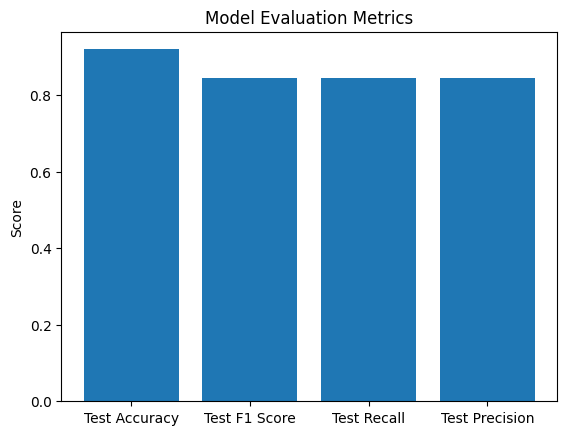

In [ ]:
# prompt: plot the bargraph  for the test accuracy,test f1 score,test recall,test precision

import matplotlib.pyplot as plt

# Define data for the bar chart
labels = ['Test Accuracy', 'Test F1 Score', 'Test Recall', 'Test Precision']
values = [accuracy, f1, recall, precision]

# Create the bar chart
plt.bar(labels, values)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')

# Display the bar chart
plt.show()
